ВВЕДЕНИЕ

Продажа компьютерных игр в интернет-магазине "Стримчик"
    
Цель работы - проанализировать исторические данные о продажах компьютерных игр, чтобы выявить закономерности, опредедяющие успешность игры. Это позволит определить потенциально популярные продукты, на которых следует сосредоточить усилия по продвижению продукта.
    
    
 Данные содержат в себе информацию о продажах компьютерных игр по всему миру до 2016 года, а именно: название игры, жанр, платформа, год выпуска, продажи в Европе, Японии и других странах, оценки пользователей и экспертов и рейтинг от организации ESRB. 
        
План работы: 
1. [загрузка данных ](#section1)
2. [предобработка данных (исследование пропусков, дублей, проверка типов данных) ](#section2)
3. [исследовательский анализ: общая информация о продажах игр в зависимости от платформы и жанра](#section3) 
4. [портрет пользователя каждого региона](#section4) 
5. [проверка гипотез о рейтингах разных платформ и жанров](#section5) 
6. [заключение ](#section6)

<a id='section1'></a>
1. Загрузка данных.

Открываем файл с данными и выведем на экран первые 10 строк.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from math import sqrt
from scipy.stats import binom, norm,  poisson

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv',sep = ',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv',sep = ',')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем общую информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


В таблице 16715 строк, пропуски встречаются в названии, годе выпуска, жанре, в оценке критиков и пользователей и в рейтинге.

<a id='section2'></a>
2. Предобработка данных

2.1 Приведем названия всех столбцов к нижнему регистру.

In [5]:
data.columns = [x.lower() for x in data.columns]

Проверим названия столбцов.

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все столбцы приведены к нижнему регистру.

2.2 Теперь обработуем пропуски в таблице.

Выведем количество пропусков в каждой строке в абсолютных значениях.

In [7]:
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Также выведем количество пропусков в каждой строке в процентах от общего числа записей.

In [8]:
data.isna().sum().sort_values()/len(data)*100

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

2.2.1 По 2 пропуска в названии и жанре можно удалить без потери важной информации.

In [9]:
data=data.dropna(subset=['name','genre'])

2.2.2 Год выпуска - важная информация для анализа, заменить пропущенные значения нечем, 1,6% пропусков - немного,  поэтому удалим строки с пропуском года выпуска.

In [10]:
data=data.dropna(subset=['year_of_release'])

Теперь, когда удалены пропуски, можно преобразовать год выпуска в целочисленную переменную.

In [11]:
data['year_of_release'] = data['year_of_release'].astype(int)

Выведем все значения, которые принимает год выпуска.

In [12]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

2.2.3 Теперь займемся пропусками в столбцах с рейтингом и оценками критиков и пользователей.

Пропусков в этих столбцах очень много (по 40% и 51%).

Посмотрим, сколько строк содержат пропуски в этих трех столбцах одновременно.

In [13]:
len(data.loc[(data['user_score'].isna()) & (data['rating'].isna())& (data['critic_score'].isna())])

6534

Как видим, подавляющая часть пропусков в столбцах с оценками критиков и пользователей, а также рейтингом ESRB, одновременная.

Чтобы понять причины одновременных пропусков, нужно понимать, как происходило наполнение этой базы  данных. Необходимо более глубокое исследование, возможно эти пропуски можно заполнить из других источников.

Такое большое количество пропусков заполнять средним или медианой кажется не вполне разумным, потому что это может сильно исказить исходное распределение. Предлагается оставить эти пропуски как есть.

Отдельного внимания заслуживает столбец с оценкой пользователей. Выведем все его значения.

In [14]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Помимо пропусков (nan) в нем встречается строка 'tbd', что означает по-видимому, 'to be determined', то есть "будет определено".

Посмотрим, сколько таких значений в столбце user_score.

In [15]:
(data['user_score']=='tbd').sum()

2376

Поскольку замена такого большого числа неизвестных значений на среднее/ медиану может исказить истинную структуру данных, предлагается эти значения заменить пропусками.

In [16]:
data['user_score'].replace('tbd', np.nan, inplace=True)

In [17]:
(data['user_score']=='tbd').sum()#проверка того, что замена tbd на NaN прошла успешно

0

Теперь пропусков в датафрейме стало больше, но для нашего анализа эти параметры не так критичны.

In [18]:
data.isna().sum().sort_values()/len(data)*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating             40.598395
critic_score       51.453418
user_score         54.615665
dtype: float64

Теперь нужно заменить строковый тип в столбце user_score на численный (вещественный), чтобы его значения можно было сравнивать.

In [19]:
data['user_score']=pd.to_numeric(data['user_score'],errors='coerce') 

Проверим еще раз типы всех переменных.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.2+ MB


Все переменные имеют правильные типы.

2.3 Проверим данные на явные дубликаты.

In [21]:
data.duplicated().sum()

0

Явных дубликатов нет. 

Предобработка данных выполнена.

2.4 Создадим столбец продаж во всех регионах, назовем его total_sales. 

In [22]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

Проверим корректность создания нового столбца.

In [23]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Теперь данные готовы для исследовательского анализа.

<a id='section3'></a>
3. Исследовательский анализ данных

3.1 Сгруппируем данные по году выпуска игры, посмотрим, сколько игр выпускалось в разные годы.

In [24]:
data_years = data.groupby('year_of_release').count()
display(data_years)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,0,0,9
1981,46,46,46,46,46,46,46,0,0,0,46
1982,36,36,36,36,36,36,36,0,0,0,36
1983,17,17,17,17,17,17,17,0,0,0,17
1984,14,14,14,14,14,14,14,0,0,0,14
1985,14,14,14,14,14,14,14,1,1,1,14
1986,21,21,21,21,21,21,21,0,0,0,21
1987,16,16,16,16,16,16,16,0,0,0,16
1988,15,15,15,15,15,15,15,1,1,1,15


Для наглядности построим столбчатую диаграмму для числа игр, выпущенных  в разные года.

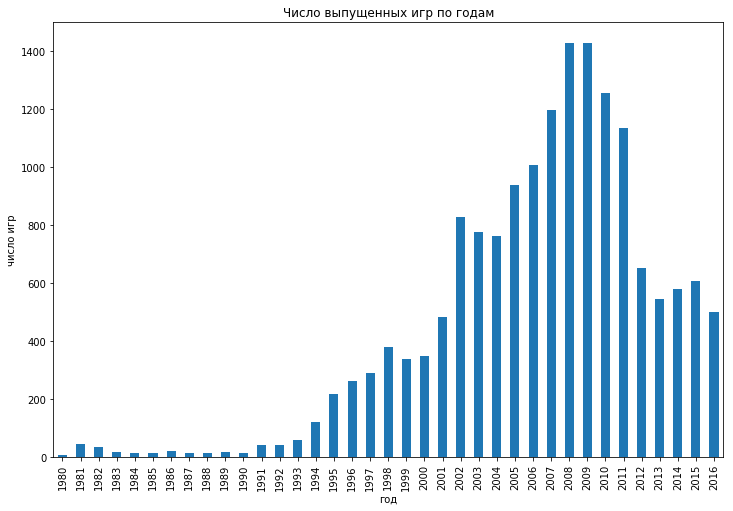

In [25]:
data_years['name'].plot.bar(figsize=(12,8))
plt.title('Число выпущенных игр по годам') 
plt.xlabel('год') 
plt.ylabel('число игр') 
plt.show() 

Из таблицы и графика видно, что до 1993 года игр выходило совсем мало (двузначное число в год). 

Затем с 1994 по 2009 наблюдается стабильный рост числа игр до максимума в 2008-2009 году (1426 игр). 

С 2010 года происходит резкий спад числа выпущенных игр, и с 2012 по 2016 наблюдается некоторая стабильность: в год выходят примерно 500-600 игр.

Удалим из таблицы данные за 1980-1993 год, они не принесут нам полезной информации, но могут попортить визуализацию нужных нам данных.

In [26]:
data=data[data['year_of_release']>1993]

3.2 Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами.

In [27]:
data.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Наибольшие продажи у платформ PS2, X360, PS3, Wii, DS, PS.

Создадим датафрейм с продажами только по этим платформам.

In [28]:
platforms=['PS2','X360','PS3','Wii','DS','PS']

In [29]:
data_platform=data[data['platform'].isin(platforms)]

Сводная таблица для продаж по годам по каждой платформе получается очень большой.

In [30]:
data1=data_platform.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc='sum')
display(data1)

total_sales
platform year_of_release             
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[66 rows x 1 columns]

Построим графики продаж для платформ с наибольшими продажами за все года.

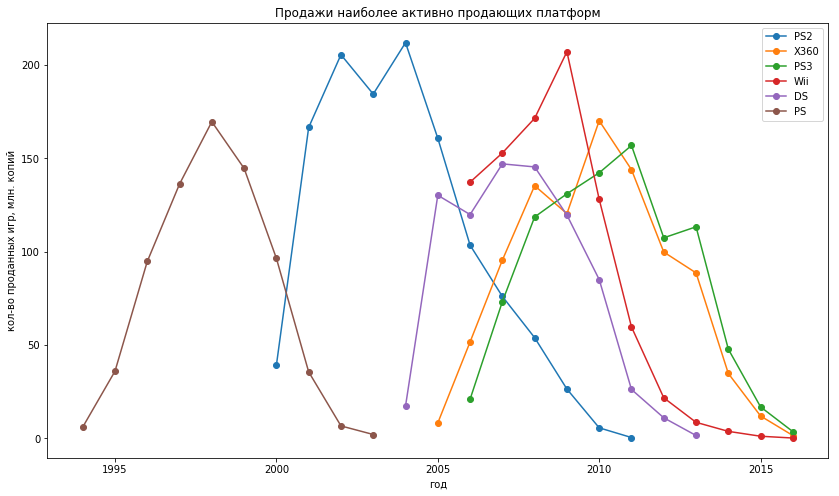

In [31]:
for i in platforms:    
    pivot_table=data[data['platform']==i].pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
    pivot_table['total_sales'].plot(kind='line',label=i,marker='o', figsize=(14,8),legend=True)
plt.title('Продажи наиболее активно продающих платформ') 
plt.xlabel('год') 
plt.ylabel('кол-во проданных игр, млн. копий') 
plt.show()

Наблюдается интересная тенденция: все эти платформы живут в среднем 10 лет, из которых первые 5 лет их продажи резко возрастают, затем в течение следующих 5 лет примерно так же резко убывают.

3.3 Поскольку с 2012 по 2016 наблюдается некоторая стабильность в количестве выпускаемых игр, а платформы живут в среднем не более 10 лет, то предлагается  взять пятилетний период с 2012 по 2016 за актуальный, и по нему строить аналитику.  Более длинный период брать нецелесообразно еще потому, что в современном мире предпочтения пользователей меняются довольно быстро, и игровая индустрия не стоит на месте. Поэтому 5 лет кажется наиболее оптимальным периодом для прогноза продаж компьютерных игр на следующий год.

Удалим из датафрейма все данные за 1993-2011 годы.

In [32]:
data=data[data['year_of_release']>2011]

3.4 Посмотрим, какие платформы лидируют по продажам за период 2012-2016.

In [33]:
data.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).head(10)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Первые пять из этого списка будем считать потенциально прибыльными.

In [34]:
platforms=['PS4','PS3','X360','3DS','XOne']

Снова построим графики продаж по платформам, чтобы оценить рост или падение продаж по этим платформам.

C:\Users\malyshkina\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


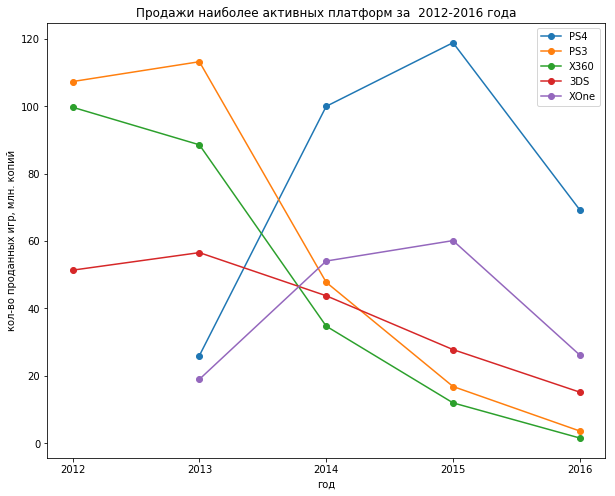

In [35]:
for i in platforms:    
    pivot_table=data[data['platform']==i].pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
    pivot_table['total_sales'].plot(kind='line',label=i,marker='o', figsize=(10,8),legend=True)

x_ticks = list(range(int(2012), int(2016)+1, 1))
ax = plt.subplot()
ax.set_xticks(x_ticks)
plt.title('Продажи наиболее активных платформ за  2012-2016 года') 
plt.xlabel('год') 
plt.ylabel('кол-во проданных игр, млн. копий') 

plt.show()

Как видно из графика, все эти платформы испытывают падение продаж за последние 2 года, а какие-то и за 4 года (хотя данные за 2016 год могут быть неполными, поэтому картина может не отражать истину в полной мере). Но судя по глобальным тенденциям, платформы PS3, X360  и 3DS находятся на закате своего развития и через пару лет перестанут существовать. У PS4 и XOne еще остался потенциал по продажам.

3.5 Построим "ящики с усами" по глобальным продажам игр в разбивке по потенциально прибыльным платформам.

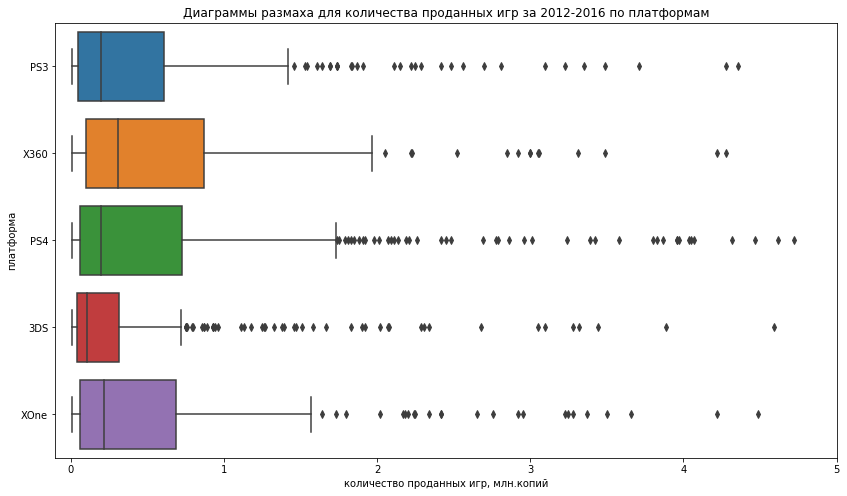

In [36]:
plt.figure(figsize=(14,8))
sns.boxplot(data=data[data['platform'].isin(platforms)], y="platform", x="total_sales",orient='h')
plt.xlim(-0.1,5)
plt.title('Диаграммы размаха для количества проданных игр за 2012-2016 по платформам') 
plt.xlabel('количество проданных игр, млн.копий') 
plt.ylabel('платформа') 
plt.show()

Из этих диаграмм можно сказать, что медианное значение числа проданных игр самое большое у X360, самое маленькое у 3DS,  то есть  средняя игра X360 продается лучше, чем средняя игра 3DS.

В то же время у 3DS есть редкие игры с  очень большими продажами, и таких игр у явно больше, чем у X360.

Значит, X360 - более стабильна в плане продаж своих игр, 3DS - более "рискованная", то есть у нее есть игры, которые могут очень удачно "выстрелить" и тем самым принести очень большие продажи.

3.6 Исследуем взаимосвязь количества продаж и рейтингов пользователей и критиков.

Сначала посмотрим, как влияют на продажи отзывы пользователей и критиков внутри одной платформы PS4.

Построим диаграмму рассеяния между отзывами и продажами.

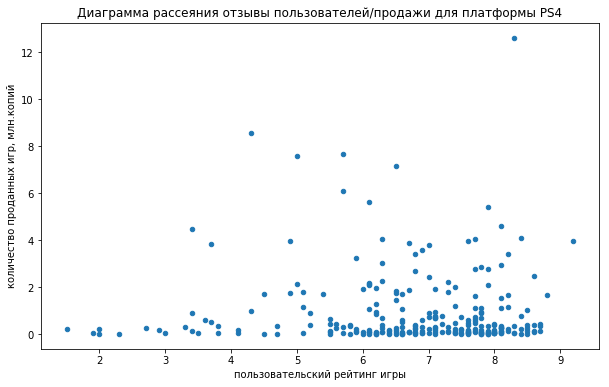

In [37]:
data[data['platform']=='PS4'].plot(y='total_sales', x='user_score', kind='scatter',figsize=(10,6)) 
plt.title('Диаграмма рассеяния отзывы пользователей/продажи для платформы PS4') 
plt.xlabel('пользовательский рейтинг игры') 
plt.ylabel('количество проданных игр, млн.копий') 
plt.show()

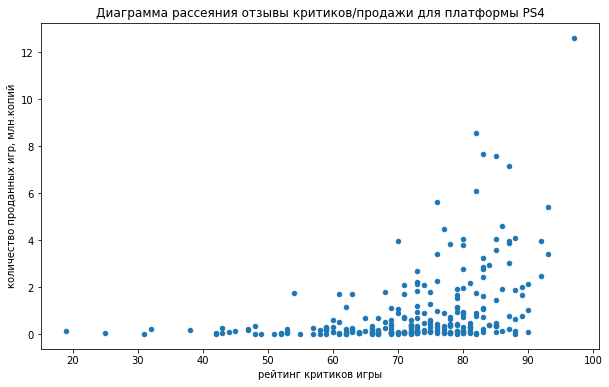

In [38]:
data[data['platform']=='PS4'].plot(y='total_sales', x='critic_score', kind='scatter',figsize=(10,6)) 
plt.title('Диаграмма рассеяния отзывы критиков/продажи для платформы PS4') 
plt.xlabel('рейтинг критиков игры') 
plt.ylabel('количество проданных игр, млн.копий') 
plt.show()

Обе диаграммы не показывают никакой сильной связи между рейтингом и продажами. Игры с большим рейтингом в большинстве имеют низкие продажи. Игр с низким рейтингом в принципе гораздо меньше, чем с высоким, и есть только несколько случаев, когда они имеют высокие продажи.

Посчитаем корреляцию между отзывами и продажами.

In [39]:
data_tmp=data[data['platform']=='PS4']
display('Корреляция рейтинга пользователей и количества продаж для PS4',data_tmp['total_sales'].corr(data_tmp['user_score']))
display('Корреляция рейтинга критиков и количества продаж для PS4',data_tmp['total_sales'].corr(data_tmp['critic_score']))

'Корреляция рейтинга пользователей и количества продаж для PS4'

-0.031957110204556466

'Корреляция рейтинга критиков и количества продаж для PS4'

0.40656790206178145

Как видно из расчета, между рейтингом пользователей и количеством проданных игр нет никакой связи, а между рейтингом критиков и продажами есть несильная прямая зависимость.

Интересно проверить, верно ли то же самое для других платформ.

Посчитаем корреляцию количества продаж и рейтинга пользователей/критиков для каждой из выбранных потенциально прибыльных платформ.

In [40]:
users=[]#создаем список рейтингов пользователей 
critics=[]#создаем список рейтингов критиков
for i in platforms:
    data_tmp=data[data['platform']==i]#для каждой платформы считаем отдельно
    users.append(data_tmp['total_sales'].corr(data_tmp['user_score']))#вносим корреляцию в список users 
    critics.append(data_tmp['total_sales'].corr(data_tmp['critic_score']))#вносим корреляцию в список  critics

Выведем найденные корреляции без названий платформ.

In [41]:
print('Корреляция рейтинга пользователей и количества продаж по разным платформам:')
for i in users:
    print(round(i,3))

Корреляция рейтинга пользователей и количества продаж по разным платформам:
-0.032
-0.005
0.006
0.198
-0.069


In [42]:
print('Корреляция рейтинга критиков и количества продаж по разным платформам::')
for i in critics:
    print(round(i,3))

Корреляция рейтинга критиков и количества продаж по разным платформам::
0.407
0.331
0.361
0.321
0.417


Для всех  платформ получились примерно одинаковые цифры: корреляция рейтинга пользователей с продажами близка к 0 (кроме одной 0,19 которая тоже слишком мала для обоснования связи), корреляция рейтинга критиков с продажами положительна, но далека от 1 (от 0,3 до 0,4). Следовательно, рейтинг пользователей никак не сказывается на продажах, а рейтинг критиков имеет прямую зависимость с продажами, но по всей видимости не линейную.

3.7 Теперь исследуем распределение игр по жанрам.

Построим сводную таблицу для расчета общего числа продаж компьютерных игр по жанрам.

In [43]:
data.pivot_table(index='genre', values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Для наглядности построим еще столбчатую диаграмму.

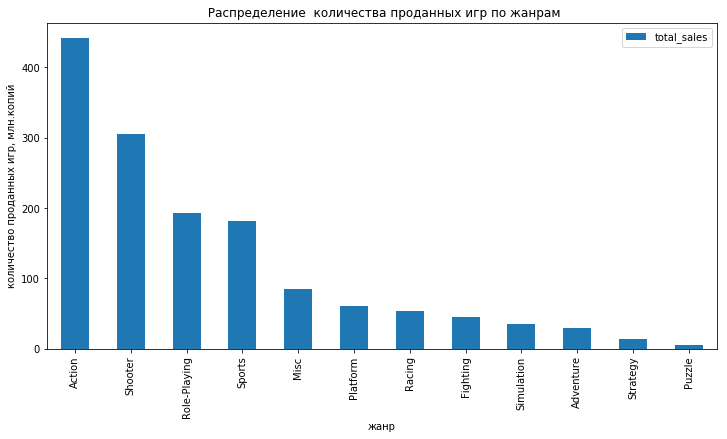

In [44]:
data.pivot_table(index='genre', values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)\
.plot(kind='bar',figsize=(12,6))

plt.xlabel('жанр') 
plt.ylabel('количество проданных игр, млн.копий') 
plt.title(' Распределение  количества проданных игр по жанрам')
plt.show()

Самый продаваемый жанр - экшн, за ним с большим отрывом шутер, затем примерно одинаковые продажи имеют ролевые игры и спортивные. Самые непопулярными оказались паззлы и стратегии, то есть самые интеллектуальные игры, что не может не огорчать. 

Рассмотрим средние продажи игр по жанрам. 
    
Построим сводную таблицу, в которой отобразим среднее число проданных копий игр каждого жанра.

In [45]:
data.pivot_table(index='genre', values='total_sales',aggfunc='mean').sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


Самым продаваемым жанром в среднем оказались шутеры, затем платформеры, спортивные игры, ролевые и гонки.
    
Самым неприбыльным жанром оказались стратегии, паззлы и приключения.   

<a id='section4'></a>
4. Составим портрет пользователя каждого региона.

4.1 Найдем самые популярные платформы для каждого региона.

Продажи игр (млн. копий) по разным платформам для Северной Америки:

In [46]:
data.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


Продажи игр (млн. копий) по разным платформам для Европы:

In [47]:
data.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


Продажи игр (млн. копий) по разным платформам для Японии:

In [48]:
data.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


Построим столбчатую диаграмму для продаж игр для разных платформ по трем регионам:

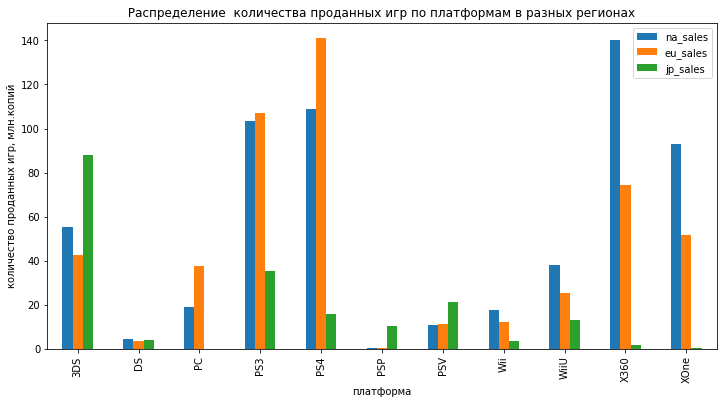

In [49]:
data_df=data[['na_sales']+['eu_sales']+['jp_sales']+['platform']]
data_df.groupby('platform').sum().plot(kind='bar',figsize=(12,6))
plt.xlabel('платформа') 
plt.ylabel('количество проданных игр, млн.копий') 
plt.title(' Распределение  количества проданных игр по платформам в разных регионах ')
plt.show()

Для Северной Америки и Европы самые популярные платформы одинаковые: PS4,PS3,X360,XOne и 3DS, только отличаются порядком в рейтинге: лидером  в Америке является  X360, в Европе -  PS4 .

В Японии только три из этих платформ вошли в их рейтинг, а лидером стала 3DS, которая в Америке и Европе находится только на 5 месте в рейтинге. 

По всей видимости, разница в рейтингах обусловлена производителем игры:  X360 - игровая приставка американской компании Microsoft,  3DS - портативная игровая система японской компании Nintendo, поэтому в своих странах этим играм было проще завоевать рынок.

4.2 Найдем теперь самые популярные жанры в этих регионах.

Продажи игр (млн. копий) по разным жанрам для Северной Америки:

In [50]:
data.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


Построим круговую диаграмму для продаж игр по жанрам в Северной Америке.

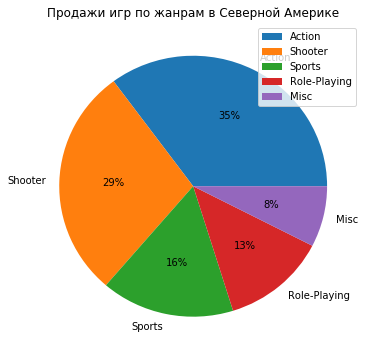

In [51]:
data.pivot_table(index='genre',values='na_sales', aggfunc='sum').\
sort_values(by='na_sales',ascending=False).head(5).plot(kind='pie',y='na_sales',figsize=(6,6),label='',autopct='%1.0f%%')
plt.title('Продажи игр по жанрам в Северной Америке')
plt.show()

In [52]:
data.pivot_table(index='genre',values='na_sales', aggfunc='sum').\
sort_values(by='na_sales',ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


Продажи игр (млн. копий) по разным жанрам для Европы:

In [53]:
data.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


Для Европы круговая диаграмма продаж игр по жанрам будет выглядеть так:

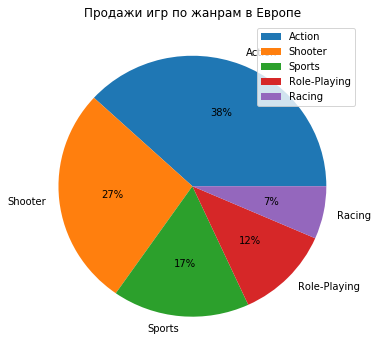

In [54]:
data.pivot_table(index='genre',values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales',ascending=False).head(5).plot(kind='pie',y='eu_sales',figsize=(6,6),label='',autopct='%1.0f%%')
plt.title('Продажи игр по жанрам в Европе')
plt.show()

Продажи игр (млн. копий) по разным жанрам для Японии:

In [55]:
data.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


Посмотрим теперь на круговую диаграмму для Японии.

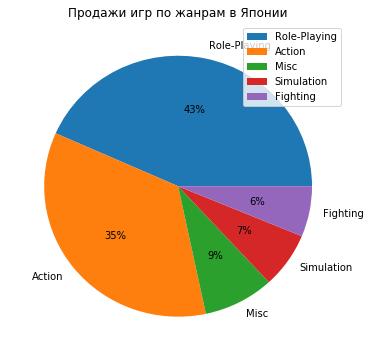

In [56]:
data.pivot_table(index='genre',values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales',ascending=False).head(5).plot(kind='pie',y='jp_sales',figsize=(6,6),label='',autopct='%1.0f%%')
plt.title('Продажи игр по жанрам в Японии')
plt.show()

Построим круговые диаграммы для трех регионов на одном графике для наглядности.

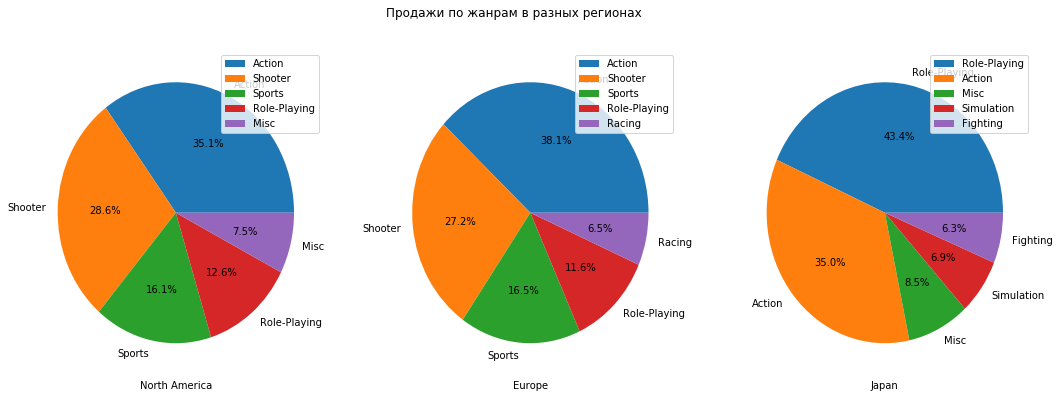

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


data1=data.pivot_table(index='genre',values='na_sales', aggfunc='sum').\
sort_values(by='na_sales',ascending=False).head(5)
data1 = data1.reset_index().rename_axis(None, axis=1)
labels1=data1['genre']


data2=data.pivot_table(index='genre',values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales',ascending=False).head(5)
data2 = data2.reset_index().rename_axis(None, axis=1)
labels2=data2['genre']

data3=data.pivot_table(index='genre',values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales',ascending=False).head(5)
data3 = data3.reset_index().rename_axis(None, axis=1)
labels3=data3['genre']

values1=data1['na_sales']
values2=data2['eu_sales']
values3=data3['jp_sales']



axs[0].pie(values1,labels=labels1,autopct='%1.1f%%')
axs[1].pie(values2,labels=labels2,autopct='%1.1f%%')
axs[2].pie(values3,labels=labels3,autopct='%1.1f%%')

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel('North America')
axs[1].set_xlabel('Europe')
axs[2].set_xlabel('Japan')


fig.suptitle('Продажи по жанрам в разных регионах')
plt.show()

В Америке и Европе рейтинги жанров оказались практически одинаковыми: самые популярные оказались экшн, шутер, спорт, ролевые игры, и только на пятой позиции предпочтения разделились: в Европе гонки, в Америке "разное".

В Японии самыми популярными оказались ролевые игры и экшн, шутеры вообще не вошли в рейтинг, зато на пятом месте оказался файтинг - жанр компьютерных игр, посвященный боевым искусствам. 

Можно сказать, что сравнение самых популярных платформ  и жанров в очередной раз подтвердило  схожесть культур Европы и Америки  и отличие от них культуры Японии.

4.3 Исследование влияния рейтинга ESRB на продажи в каждом регионе

Посчитаем число игр (млн.копий), купленных в Северной Америке, с разным рейтингом ESRB (М - для взрослых, Е - для всех, в том числе детей 6+, Е10+ - для детей 10+, Т - для подростков).

In [58]:
data.pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
rating,
M,231.57
E,114.37
E10+,75.70
T,66.02


То же самое посчитаем для Европы.

In [59]:
data.pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
rating,
M,193.96
E,113.03
E10+,55.37
T,52.96


И для Японии.

In [60]:
data.pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
rating,
E,28.33
T,26.02
M,21.20
E10+,8.19


Для  визуализации построим столбчатую диагрмамму для всех регионов.

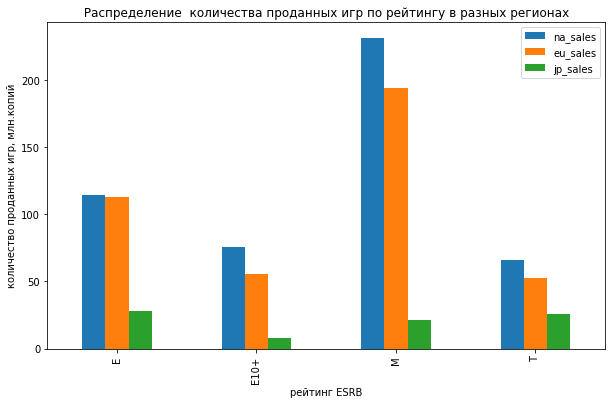

In [61]:
data_df=data[['na_sales']+['eu_sales']+['jp_sales']+['rating']]
data_df.groupby('rating').sum().plot(kind='bar',figsize=(10,6))

plt.xlabel('рейтинг ESRB') 
plt.ylabel('количество проданных игр, млн.копий') 
plt.title(' Распределение  количества проданных игр по рейтингу в разных регионах ')
plt.show()

Как видим, в Америке и Европе лучше всего продаются игры для взрослых, хуже всего - для подростков.

В Японии наоборот, игры для 6+ и для подростков продаются лучше, чем игры для взрослых, но игры 10+ продаются хуже всего.

Портрет пользователя каждого региона.
    
В Америке и Европе средние пользователи выглядят одинаково:
взрослые, играющие в экшн, шутер или спорт, только в Америке больше всего играют на  X360, в Европе - PS4.
    
В Японии средний пользователь - ребенок или подросток, играющий в ролевые игры и экшн на 3DS.

<a id='section5'></a>
5. Проверка гипотез

5.1 Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и  PC одинаковые.

Сначала выделим в исходных данных 2 набора, относящиеся  к этим платформам.

In [62]:
data1=data[data['platform']=='XOne']

In [63]:
data2=data[data['platform']=='PC']

На всякий случай проверим, сколько данных в этих наборах.

In [64]:
data1['user_score'].count()

182

In [65]:
data2['user_score'].count()

206

Итого, в столбце с пользовательским рейтингом  182 и 206 значения соответственно, то есть размер выборок примерно одинаковый. Но нужно будет учесть, что в столбцах с рейтингом есть пропуски.

Пусть m_1 - средний рейтинг по платформе XOne,  m_2 - средний рейтинг по платформе PC.

Нам нужно проверить гипотезу о равенстве средних двух независимых выборок, альтернативная гипотеза о том, что они не равны (двустороняя гипотеза).

Тогда нулевая и альтернативная гипотеза имеют вид:

H_0:  m_1 = m_2

H_1: m_1! = m_2

Для проверки гипотезы используем двухвыборочный t-test для независимых выборок.

Уровень значимости примем 5%.

In [66]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data1['user_score'], data2['user_score'],alternative='two-sided',nan_policy='omit')

print('средний рейтинг по платформе XOne:',data1['user_score'].mean())
print('средний рейтинг по платформе PC:',data2['user_score'].mean())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

средний рейтинг по платформе XOne: 6.52142857142857
средний рейтинг по платформе PC: 6.428640776699027
p-значение: 0.5535080500642724
Не получилось отвергнуть нулевую гипотезу


p-значение получилось очень маленькое, значит вероятность получить наблюдаемые средние при выбранной нулевой гипотезе близка к 0. Отвергаем нулевую гипотезу в пользу альтернативной, значит гипотеза о равенстве средних пользовательских рейтингов по платформам XOne и PC неверна.

5.2 Проверим гипотезу о том, что средние пользовательские рейтинги жанров экшн и спорт разные.

Выделим из исходного датафрейма 2 выборки с жанром экшн и спорт соответственно.

In [67]:
data1=data[data['genre']=='Action']

In [68]:
data2=data[data['genre']=='Sports']

Проверим, сколько данных в этих двух наборах.

In [69]:
data1['user_score'].count()

523

In [70]:
data2['user_score'].count()

195

В первом наборе 523 значения рейтинга, во втором 195, размер выборок достаточен для проверки гипотезы.

Обозначим m_1 - средний рейтинг по жанру экшн,  m_2 - средний рейтинг по жанру спрорт.

Нам нужно проверить гипотезу о равенстве средних двух независимых выборок, альтернативная гипотеза о том, что они не равны (двустороняя гипотеза). В данном случае нас интересует альтернативная гипотеза.

H_0: m_1 = m_2

H_1: m_1! = m_2

Используем двухвыборочный t-test для независимых выборок с двусторонней альтернативой.

In [71]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data1['user_score'], data2['user_score'],alternative='two-sided',nan_policy='omit')

print('средний рейтинг по жанру экшн:',round(data1['user_score'].mean(),2))
print('средний рейтинг по жанру спорт:',round(data2['user_score'].mean(),2))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

средний рейтинг по жанру экшн: 6.83
средний рейтинг по жанру спорт: 5.46
p-значение: 3.716308946093586e-26
Отвергаем нулевую гипотезу


Итак, p-значение снова получилось очень маленькое, отвергаем нулевую гипотезу в пользу альтернативной, значит средние рейтинги по жанру экшн и спорт не равны.

<a id='section6'></a>
<b>Заключение</b>

Проведен анализ данных о продажах компьютерных игр за актуальный период  2012-2016 год.    

1.   Предобработка выявила большое количество пропусков (> 40%)   в столбцах с рейтингами и оценками критиков и пользователей. 
В связи с их большим количеством решено не заполнять пропуски никаким другими величинами, чтобы не искажать исходное распределение.
Аббревиатура ‘tbd’ в столбце с оценкой пользователей заменена на пропуски.
В двух столбцах тип значений изменен для того, чтобы была возможность провести анализ данных.


2. Проведен Исследовательский анализ

Рассчитано, сколько игр выпускалось в разные годы и как менялись продажи по платформам.
Выбраны платформы с наибольшими суммарными продажами, с ростом и падением продаж за актуальный период.
Выявлен средний срок жизни платформы – 10 лет.
Показано, что между отзывами пользователей и продажами нет никакой связи, между отзывами критиков и продажами есть положительная корреляция, но не очень большая, чтобы можно было говорить о линейной зависимости.
Выявлены самые прибыльные жанры, а также жанры с  самыми низкими продажами.

3. Для каждого региона (Северная Америка, Европа, Япония) выявлены самые популярные платформы и жанры.

Исследовано, как рейтинг ESRB влияет на продажи в каждом регионе.

4. Проверены статистические гипотезы.

Выявлено, что  гипотеза о равенстве средних пользовательских рейтингов по платформам XOne и PC неверна,
а гипотеза о том, что средние рейтинги по жанру экшн и спорт разные, верна.

Таким образом, если планировать продажи на 2017 год в Европе/Америке, то можно выделить наиболее потенциально популярный продукт:
это игра в жанре экшн/ шутер/ спорт или ролевые игры, на платформе PS4 и XOne, с рейтингом М (для взрослых)  по ESRB.
